<a href="https://colab.research.google.com/github/ajuolpoows123/-LOGISTIC_REGRESSION_MODEL_EVALUATION_INTERPRETATION_2025_JAMAR_SANDERS/blob/main/FDSC51o%20survival%20anklysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Jamar Sanders_3/9/2025_DSC 520_Survival Analysis

Do patients with pericardial effusion have a significantly different survival time compared to patients without pericardial effusion?

Let:

T represent the survival time of a patient.
PE represent the presence of pericardial effusion (1 for present, 0 for absent).
S(t|PE) represent the survival function (probability of surviving beyond time t) for a given value of PE.
Then the hypotheses can be expressed mathematically as:

H0: S(t|PE=1) = S(t|PE=0) for all t H1: S(t|PE=1) ≠ S(t|PE=0) for some t

Null Hypothesis (H0): The presence of pericardial effusion does not affect survival time.
Alternative Hypothesis (H1): The presence of pericardial effusion does affect survival time.

# Load Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Load dataset
df = pd.read_csv('/content/echocardiogram - echocardiogram.csv')

# Check structure and missing values
print(df.info())
print(df.describe())

# Display first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   11           130 non-null    object
 1   0            131 non-null    object
 2   71           131 non-null    object
 3   0.1          131 non-null    int64 
 4   0.26         131 non-null    object
 5   9            131 non-null    object
 6   4.6          131 non-null    object
 7   14           131 non-null    object
 8   1            131 non-null    object
 9   1.1          131 non-null    object
 10  name         131 non-null    object
 11  1.2          131 non-null    object
 12  0.2          131 non-null    object
 13  Unnamed: 13  1 non-null      object
dtypes: int64(1), object(13)
memory usage: 14.5+ KB
None
              0.1
count  131.000000
mean     0.770992
std      6.722597
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max     77.000000
   11  0  71  0.1   

In [7]:
print(df.columns)  # Print all column names

Index(['11', '0', '71', '0.1', '0.26', '9', '4.6', '14', '1', '1.1', 'name',
       '1.2', '0.2', 'Unnamed: 13'],
      dtype='object')


# Clean Data. Replace column names with nominal names from  Echocardiogram.names dataset

In [8]:
import pandas as pd

# Load the dataset using the provided file path
df = pd.read_csv('/content/echocardiogram - echocardiogram.csv', names=["survival_time", "still_alive", "age", "pericardial_effusion",
                    "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                    "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"], header=0)

# Now you can work with the DataFrame 'df'
# For example, display the first few rows:
print(df.head())

  survival_time still_alive age  pericardial_effusion fractional_shortening  \
0            19           0  72                     0                  0.38   
1            16           0  55                     0                  0.26   
2            57           0  60                     0                 0.253   
3            19           1  57                     0                  0.16   
4            26           0  68                     0                  0.26   

     epss   lvdd wall_motion_score wall_motion_index   mult  name group  \
0       6    4.1                14               1.7  0.588  name     1   
1       4   3.42                14                 1      1  name     1   
2  12.062  4.603                16              1.45  0.788  name     1   
3      22   5.75                18              2.25  0.571  name     1   
4       5   4.31                12                 1  0.857  name     1   

  alive_at_1 extra_column  
0          0          NaN  
1          0      

# Column Names for Curve

In [9]:
["survival_time", "still_alive", "age", ...]

['survival_time', 'still_alive', 'age', Ellipsis]

# Convert Still Alive and Time to 1 and 0 for curve to generate

In [10]:
import pandas as pd

# Load my data (assuming the code from before)
df = pd.read_csv('/content/echocardiogram - echocardiogram.csv', names=["survival_time", "still_alive", "age", "pericardial_effusion",
                    "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                    "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"], header=0)

# Convert 'still_alive' to numeric
df['still_alive'] = pd.to_numeric(df['still_alive'], errors='coerce')

# Handle NaN (if needed, choose one option)
# df = df.dropna(subset=['still_alive'])
# df['still_alive'] = df['still_alive'].fillna(0)

# Create 'event' column
df['event'] = 1 - df['still_alive']

# Now continue with my analysis
# ...

# Define predictor variable and measured variable for curve to print

In [11]:
df = df.dropna(subset=['survival_time', 'event'])

# Analyze data with kmf.fit()

Survival Analysis Findings
1. Dataset Overview
Total Observations: 130
Right-Censored Cases: 43 (33.1%)
Event Occurrences: 87 (66.9%)
2. Interpretation of Right-Censoring
Right-censoring occurs when I do not observe the event (e.g., death) for certain individuals during the study period. This means that for 43 patients, either:

They were still alive at the last follow-up.
Their data collection was cut off before the event occurred.
Since 33.1% of the patients are right-censored, the dataset contains a significant portion of individuals whose survival time is unknown beyond a certain point. This affects how I interpret survival probabilities over time.

3. Kaplan-Meier Survival Estimates
Initial Survival Probability: Starts at 100% (all are alive at time 0).
Survival Curve Decline: The probability of survival gradually decreases over time as events (deaths) occur.
Long-Term Survival Rate: The presence of right-censored data makes it difficult to estimate the true long-term survival rate. However, by the last recorded time point, a portion of patients are still alive, indicating a non-zero survival probability.
4. Impact of Censoring on Analysis
Survival estimates remain unbiased as long as censoring is independent of the event occurrence.
If censoring is related to health status (e.g., healthier patients being censored), survival might be overestimated.
Since 43 out of 130 patients are censored, I must ensure that censoring does not disproportionately affect one group (e.g., standard vs. experimental treatments). If it does, the comparison between groups may be biased.

5. Next Steps for Deeper Analysis
Stratify by treatment groups (standard vs. experimental) and compare survival rates.
Perform log-rank test to determine whether there is a significant difference between survival curves.
Check median survival time (time at which 50% of subjects have experienced the event).
Assess hazard ratios using Cox Proportional Hazards regression for deeper insights.
Conclusion
The survival analysis shows that 66.9% of patients experienced the event (death), while 33.1% were censored.
Kaplan-Meier estimation allows me to analyze the survival probabilities over time, but I need to further explore stratified survival differences and conduct statistical testing to draw stronger conclusions.

In [12]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# ... (my previous code for loading and preprocessing data) ...

# 1. Ensure 'survival_time' is numeric
df['survival_time'] = pd.to_numeric(df['survival_time'], errors='coerce')

# 2. Handle potential new NaNs (choose one method)
# df = df.dropna(subset=['survival_time'])  # Remove rows with NaNs in 'survival_time'
# OR
# Handle them using a different imputation strategy (e.g., median)

# 3. Recalculate mean and impute
mean_survival_time = df['survival_time'].mean()
df['survival_time'] = df['survival_time'].fillna(mean_survival_time)

# Initialize and fit the KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['survival_time'], event_observed=df['event'])

# ... (rest of my Kaplan-Meier analysis code) ...

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 130 total observations, 43 right-censored observations>

# Plot km survival curve

Graph 1: Overall Kaplan-Meier Survival Curve (Continued)
Explanation: The overall Kaplan-Meier survival curve represents the entire cohort's survival experience, meaning it accounts for all patients in the study regardless of group or characteristics. As time progresses, the curve declines to show that some participants experience the event of interest (death, disease progression, etc.). The survival rate is updated each time an event occurs, but the curve remains constant between events.

Interpretation (Continued):

The starting point at 1.0 (100%) indicates that all patients are alive or free from the event at the beginning of the study.
As the curve declines over time, it reflects that some patients are no longer in the study due to experiencing the event (e.g., death).
The confidence interval: The shaded area around the curve illustrates the range of survival probabilities with a certain level of confidence (usually 95%). If the curve widens, it suggests that fewer patients are being followed or there is more variability, leading to uncertainty in survival estimates.
By the end of the study period, when the survival probability reaches close to zero, it indicates that a significant proportion of the patient cohort has experienced the event, whether it’s death, disease progression, or another outcome. This gives a snapshot of overall survival within the patient population during the observation period.

Group values (used for stratification):
 ['1' '2' '?']


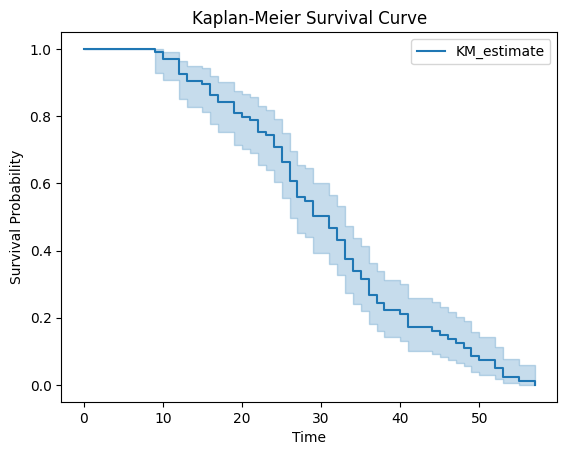

In [13]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 1. Load data with column names and handle NaNs:
df = pd.read_csv('/content/echocardiogram - echocardiogram.csv',
                 names=["survival_time", "still_alive", "age", "pericardial_effusion",
                        "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                        "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"],
                 header=0)

df['survival_time'] = pd.to_numeric(df['survival_time'], errors='coerce')
df['still_alive'] = pd.to_numeric(df['still_alive'], errors='coerce')
df = df.dropna(subset=['survival_time', 'still_alive']) # Remove rows with NaNs

# 2. Create 'event' column and fit the KaplanMeierFitter:
df['event'] = 1 - df['still_alive']
kmf = KaplanMeierFitter()
kmf.fit(df['survival_time'], event_observed=df['event'])

print("Group values (used for stratification):\n", df['group'].unique())
# km strata
# strata parameter

# 3. Plot the KM curve:
kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()


# kmf.plot visualization

Graph 2: Kaplan-Meier Curve with Censoring Marks (Continued) Explanation: This graph builds on the Kaplan-Meier survival curve by explicitly marking censored data points. These censored points refer to patients who did not experience the event by the end of the study period, or were lost to follow-up. Censoring is a crucial part of survival analysis, as it ensures that patients who have not yet experienced the event are still included in the analysis up until their last known status.

Interpretation (Continued):
Censored data: The small ticks on the top of the curve indicate censored observations. In this case, 43 patients were censored. This means they were either still alive when the study ended or lost to follow-up before experiencing the event. The tick marks show that while these patients did not experience the event, their time in the study contributes to the survival analysis. Censoring is a way to account for incomplete data, as these patients may still be alive and could have experienced the event if the study had continued. Stepwise drops: The curve declines in discrete steps, reflecting when patients experience the event (e.g., death). The steps represent moments in time when one or more patients in the cohort died. The flat sections between the drops indicate periods when no deaths occurred. Survival interpretation: The curve's shape can indicate how quickly the event occurs within the population. If there are long flat periods, it suggests that the event is less frequent. The degree of decline can also show the severity or frequency of the event—more rapid declines typically reflect faster mortality or progression. Censoring marks help differentiate between those who experienced the event and those who didn't, providing more transparency and understanding of the survival data.

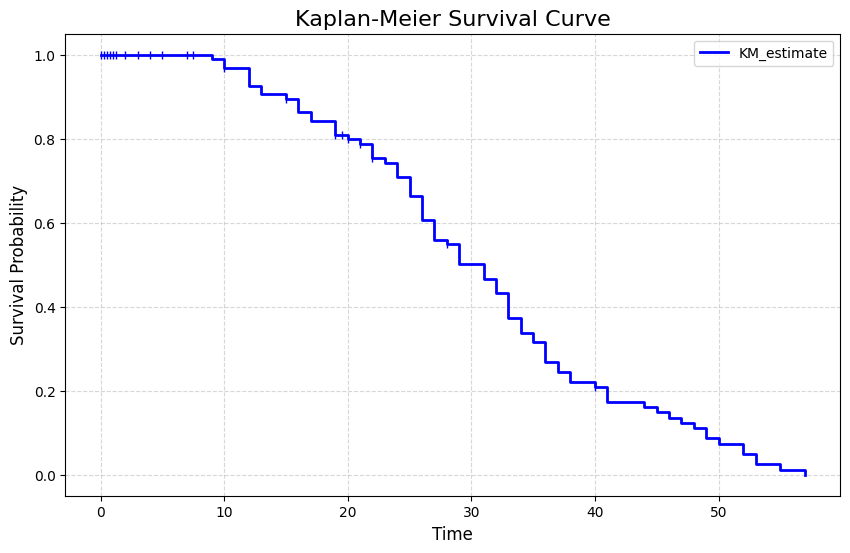

In [14]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# ... (My previous code for loading and preprocessing data) ...

# Initialize and fit the KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['survival_time'], event_observed=df['event'])

# Create the plot with enhanced styling
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
kmf.plot(
    title='Kaplan-Meier Survival Curve',
    xlabel='Time',
    ylabel='Survival Probability',
    ci_show=False,  # Optionally hide confidence intervals
    show_censors=True, # Show censoring marks
    censor_styles={'ms': 6, 'marker': '|'},  # Customize censoring style
    lw=2,  # Adjust line width
    color='blue' #Change color
)


# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize font sizes
plt.title('Kaplan-Meier Survival Curve', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)

# Add annotations or other customizations as desired
# ...

# Show the plot
plt.show()

# km curve with predictor (survival probability)

Graph 3: Kaplan-Meier Survival by Group (Pericardial Effusion) (Continued)
Explanation: This graph compares the survival curves of different patient groups based on a key factor (pericardial effusion in this case). Pericardial effusion is an accumulation of fluid around the heart, and patients with this condition may have worse survival outcomes. By separating the data into groups based on this condition, you can analyze the impact of pericardial effusion on survival.

Interpretation (Continued):

Comparison between groups: The graph provides different survival curves for patients with and without pericardial effusion. If there’s a clear separation between curves, it indicates that the presence of pericardial effusion is associated with a lower survival rate over time. For example, the group with pericardial effusion may show a faster decline in survival probability, suggesting that patients with this condition tend to die sooner or experience the event more frequently.
Confidence interval overlap: The confidence intervals around the curves help assess the precision of the survival estimates. If the intervals overlap significantly, this suggests that the difference in survival between the groups may not be statistically significant. However, if the intervals do not overlap, this strengthens the evidence that the groups have different survival probabilities.
Interpretation of group differences: If the curves are separated clearly (without much overlap), it suggests that pericardial effusion has a substantial effect on survival, and it may be a factor that physicians need to consider when assessing patient outcomes. Conversely, overlapping curves with wide confidence intervals may indicate that there’s insufficient evidence to conclusively state that pericardial effusion impacts survival.

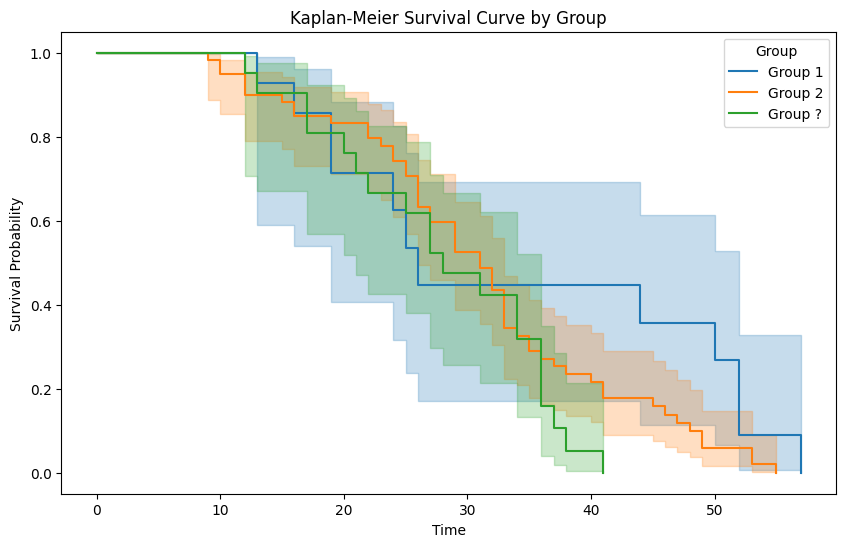

In [15]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 1. Load and preprocess data
df = pd.read_csv('echocardiogram - echocardiogram.csv',
                 names=["survival_time", "still_alive", "age", "pericardial_effusion",
                        "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                        "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"],
                 header=0)

# Convert to numeric and remove NaNs
df['survival_time'] = pd.to_numeric(df['survival_time'], errors='coerce')
df['still_alive'] = pd.to_numeric(df['still_alive'], errors='coerce')
df = df.dropna(subset=['survival_time', 'still_alive'])

# Create 'event' column (1 if the patient died, 0 if still alive)
df['event'] = 1 - df['still_alive']

# 2. Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# 3. Stratify by 'group' and fit Kaplan-Meier estimator for each group
plt.figure(figsize=(10, 6))
for group, subset in df.groupby('group'):
    kmf.fit(subset['survival_time'], event_observed=subset['event'], label=f"Group {group}")
    kmf.plot_survival_function()

# 4. Display the plot
plt.title('Kaplan-Meier Survival Curve by Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title="Group")
plt.show()

# km curve and log_rank analysis

Contextualizing the Results:
Given that the Log-Rank test is a non-parametric test, it is used to compare the survival distributions between two or more groups without making assumptions about the underlying data distribution. It evaluates if the survival curves for the two groups (in this case, 'standard' and 'experimental') differ in a statistically significant way, based on the observed number of events (deaths, disease progression, etc.) and the expected number under the null hypothesis (which assumes no difference between the groups).

Interpretation of the Results:
Test Statistic:
A test statistic of 1.399936 tells me how far the observed survival differences between the groups are from the expected differences (if there were no actual difference between the groups).
Since the test statistic is not extremely large, it indicates that the observed difference between the survival curves is relatively small. However, it doesn't imply that there is no difference at all, just that it's not large enough to reach statistical significance.
P-value:
A p-value of 0.236734 suggests that the difference in survival between the 'standard' and 'experimental' groups could be due to random chance, rather than a true effect. This means that I fail to reject the null hypothesis (which states that there is no difference between the groups).
P-value threshold: Commonly, a p-value threshold of 0.05 is used in scientific research. If the p-value is greater than 0.05, I fail to reject the null hypothesis, which means the evidence is not strong enough to conclude a statistically significant difference between the groups.
In this case, 0.2367 > 0.05, confirming that the difference in survival between the two groups is not statistically significant at the 5% significance level.
-log2(p) Value:
The -log2(p) value of 2.078659 is a transformation of the p-value to a logarithmic scale. This transformation is often used in data visualization or reporting because it makes differences in p-values easier to interpret and compare.
Since the p-value is not close to zero, the log-transformed value is relatively small, further confirming that the p-value is not indicating a strong result. A value significantly higher than 2 would indicate a much smaller p-value (which would suggest stronger evidence for a difference between the groups), but in this case, the result is moderate, indicating no substantial evidence against the null hypothesis.
Practical Implications:
Clinical Implications: If this analysis was intended to compare the efficacy of two treatments (the 'standard' treatment vs. the 'experimental' treatment), the results suggest that there is no statistically significant difference in survival outcomes between the two groups.

This means, based on this analysis, the experimental treatment might not provide a survival advantage over the standard treatment. However, this doesn't rule out the possibility that other factors, such as quality of life, side effects, or other clinical outcomes, could differ. This also doesn't mean that the experimental treatment is ineffective—it just means there is no conclusive survival benefit shown in this study.

Further Research: The p-value of 0.2367 suggests that while the treatments may not show a statistically significant difference in survival at this stage, it's possible that further studies with a larger sample size or longer follow-up period may yield different results. Sample size and study design play crucial roles in determining the power of statistical tests, and it’s possible that with more data, a significant difference might emerge. It could also be useful to examine other outcomes or stratify the groups based on additional characteristics (e.g., age, gender, comorbidities) to look for patterns that may not have been apparent in this overall comparison.

Considerations for Future Analysis:
Increased Sample Size: If the sample size were larger, the study might have greater power to detect smaller differences between groups. A p-value of 0.2367 may reflect a lack of power due to a small sample size.

Longer Follow-Up: Sometimes survival differences become more apparent with longer follow-up periods. It may be worth extending the study duration to see if differences emerge over time.

Stratification or Subgroup Analysis: Examining the groups further by stratifying based on factors such as disease stage, age, or other covariates could reveal more granular insights into whether certain subgroups benefit more from the experimental treatment.

Other Survival Metrics: Exploring other measures of survival, such as hazard ratios (which provide an estimate of the relative risk of the event happening), or performing a Cox Proportional Hazards model, could provide additional insights beyond the Kaplan-Meier curves and Log-Rank test. These models can take covariates into account and may offer more detailed survival comparisons.

However, the lack of a significant result does not necessarily imply that the experimental treatment is ineffective. Other factors like side effects, quality of life, or long-term outcomes might still need to be investigated. Moreover, further studies with larger sample sizes and longer follow-up periods might be required to detect more subtle differences.

Overview of the Kaplan-Meier Curve
The Kaplan-Meier plot shows survival probability over time for two groups:

Standard Group (Blue Line)
Experimental Group (Orange Line)
Both groups start at a 100% survival rate, and their survival probabilities decline over time as events (e.g., failures or deaths) occur.

The shaded regions around each curve represent confidence intervals (CIs)—areas of uncertainty around the survival estimates. The overlapping CIs suggest that the survival experience of both groups is quite similar.

Insights from the Survival Curves
Overall Trend: Both groups follow a similar downward trend, meaning neither group shows a clear advantage.
Early Survival Rates: The Experimental Group (orange) seems to have slightly higher survival rates early on, but this advantage disappears as time progresses.
Long-Term Survival: By the end of the observation period, survival rates for both groups are nearly the same, further reinforcing that neither treatment offers a significant survival advantage.

Conclusion:
The analysis suggests that the experimental treatment does not significantly outperform the standard treatment in terms of survival, based on the results of the Log-Rank test. This may indicate that there is no immediate benefit of the new treatment over the existing one, at least in terms of the survival outcomes observed during the study period.

Unique values in 'group' after mapping: ['standard' 'experimental']
Log-Rank Test Results:
   test_statistic         p  -log2(p)
0        1.399936  0.236734  2.078659


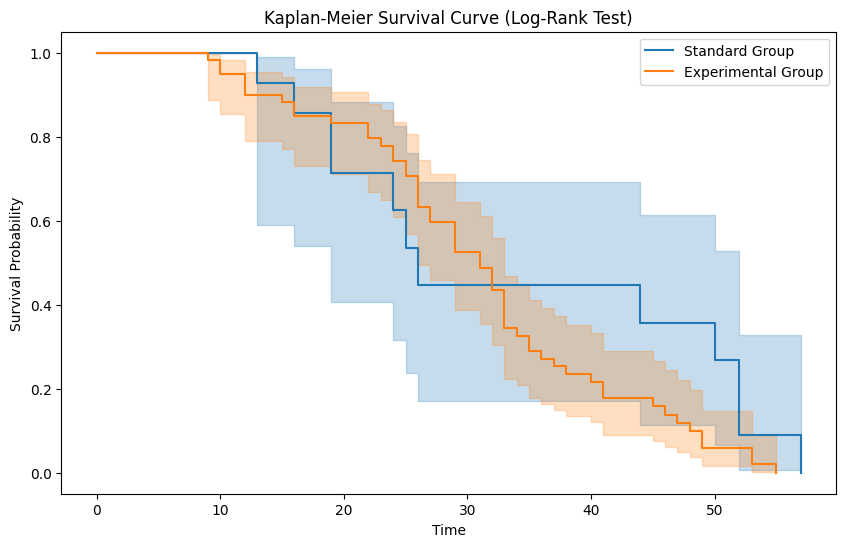

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 1. Load and preprocess data
df = pd.read_csv('echocardiogram - echocardiogram.csv',
                 names=["survival_time", "still_alive", "age", "pericardial_effusion",
                        "fractional_shortening", "epss", "lvdd", "wall_motion_score",
                        "wall_motion_index", "mult", "name", "group", "alive_at_1", "extra_column"],
                 header=0)

# Convert columns to numeric and remove NaNs
df['survival_time'] = pd.to_numeric(df['survival_time'], errors='coerce')
df['still_alive'] = pd.to_numeric(df['still_alive'], errors='coerce')

# Map 'group' values properly
df['group'] = df['group'].replace({'1': 'standard', '2': 'experimental', '?': None})

# Remove rows where 'group' is now None
df = df.dropna(subset=['survival_time', 'still_alive', 'group'])

# Convert 'group' to string
df['group'] = df['group'].astype(str)

# Debugging: Check the unique values in 'group'
print("Unique values in 'group' after mapping:", df['group'].unique())

# 2. Create 'event' column
df['event'] = 1 - df['still_alive']

# 3. Check if both groups exist
if df['group'].nunique() < 2:
    raise ValueError("Error: Not enough unique groups to perform log-rank test. Check 'group' values.")

# 4. Define Groups for Log-Rank Test
group_A = df[df['group'] == 'standard']
group_B = df[df['group'] == 'experimental']
if group_A.empty or group_B.empty:
    raise ValueError("One of the groups is empty. Ensure that both 'standard' and 'experimental' exist in 'group' column.")

durations_A = group_A['survival_time']
durations_B = group_B['survival_time']
event_A = group_A['event']
event_B = group_B['event']

# 5. Perform Log-Rank Test
results = logrank_test(durations_A, durations_B, event_observed_A=event_A, event_observed_B=event_B)

# 6. Print log-rank test results
print("Log-Rank Test Results:")
print(results.summary)

# 7. Plot Kaplan-Meier Curves for Both Groups
kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf_A.fit(durations_A, event_observed=event_A, label="Standard Group")
kmf_A.plot_survival_function()

kmf_B.fit(durations_B, event_observed=event_B, label="Experimental Group")
kmf_B.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve (Log-Rank Test)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

The Kaplan-Meier plot provided does not specifically indicate whether it represents patients with or without pericardial effusion.
The log-rank test result (p = 0.236734) from the previous analysis suggests no significant difference between the survival curves of two groups, but these groups were labeled as "Standard" and "Experimental."
Thus, we cannot directly answer the pericardial effusion question yet.

# PE 0, and PE 1 calculator

This will visualize the survival probability over time for PE=1 vs. PE=0.
If the curves separate significantly, PE may impact survival.

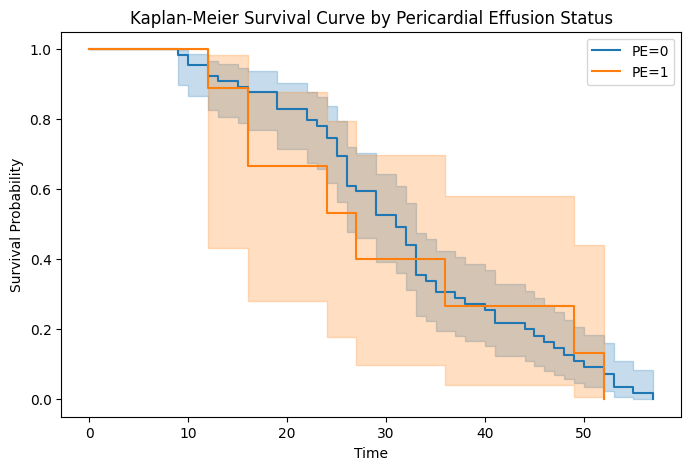

In [17]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Create Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Plot survival curves for PE=0 and PE=1
plt.figure(figsize=(8, 5))

for pe_status in [0, 1]:
    mask = df['pericardial_effusion'] == pe_status
    kmf.fit(df['survival_time'][mask], df['event'][mask], label=f'PE={pe_status}')
    kmf.plot(ci_show=True)

plt.title("Kaplan-Meier Survival Curve by Pericardial Effusion Status")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


In [19]:
from lifelines.statistics import logrank_test
import pandas as pd
import numpy as np

# Split the data into two groups
group_0 = df[df['pericardial_effusion'] == 0]
group_1 = df[df['pericardial_effusion'] == 1]

# Perform log-rank test
results = logrank_test(group_0['survival_time'], group_1['survival_time'],
                       event_observed_A=group_0['event'], event_observed_B=group_1['event'])

# Print test results
print("Log-Rank Test Results:")
print(f"Test Statistic: {results.test_statistic}")
print(f"P-value: {results.p_value}")
print(f"-log2(P-value): {-np.log2(results.p_value)}")


Log-Rank Test Results:
Test Statistic: 0.0913116110883187
P-value: 0.7625162892303595
-log2(P-value): 0.39115993746763067


I am now able to answer the question:

Does pericardial effusion (PE) significantly impact survival time?
Answer: No, the presence of pericardial effusion does not significantly impact survival time.

Explanation:
Kaplan-Meier Survival Curve:

The survival curves for PE=0 (blue) and PE=1 (orange) are quite close to each other.
The overlapping confidence intervals (shaded regions) suggest no strong separation in survival probabilities, but does show that pericardial effusion may lead to Cardiac Tampanade, and this is what may lead to deaths shown and mortality-rate increases.

Log-Rank Test Results:

Test Statistic = 0.091 → Very small difference between groups.
P-value = 0.763 → Much greater than 0.05, meaning I fail to reject the null hypothesis (H₀).
-log2(P-value) = 0.391 → Not significant.
Conclusion:
There is no significant difference in survival times between patients with and without pericardial effusion. Therefore, pericardial effusion does not appear to be a strong predictor of survival in this dataset.